## 1번 문제

1. num_1 폴더의 tsv 파일을 데이터프레임으로 불러온다. 
2. 숫자 의미를 가지지 않은 order_id는 str의 형태로 변경한다. 
3. 가장 많이 주문을 한 item_name과 그 수량을 출력한다. 
4. item당 주문 총량을 구하고 바형 그래프로 시각화하여 출력한다. 
5. item_price가 object형태의 데이터임으로 float 형태로 변경한다. 
6. 주문당 평균 계산 금액을 출력한다. 
7. 각 아이템의 가격을 출력 후 가격 분포 그래프와 가격 히스토그램을 출력한다. 
8. "Chicken Bowl"을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량을 출력한다. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
# 1. num_1 폴더의 tsv 파일을 데이터프레임으로 불러온다. 

chipotle = pd.read_csv("C:/ubion/문제 2회차/num_1/chipotle.tsv", sep="\t")

chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
# 2. 숫자 의미를 가지지 않은 order_id는 str의 형태로 변경한다. 

chipotle.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [5]:
chipotle["order_id"] = chipotle["order_id"].astype(str)

chipotle["order_id"].dtype

dtype('O')

In [6]:
# 3. 가장 많이 주문을 한 item_name과 그 수량을 출력한다. 

chipotle[["item_name","quantity"]].max()

item_name    Veggie Soft Tacos
quantity                    15
dtype: object

In [7]:
chipotle.groupby("item_name").sum()["quantity"]

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


In [8]:
chipotle["item_name"].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

<AxesSubplot:xlabel='item_name'>

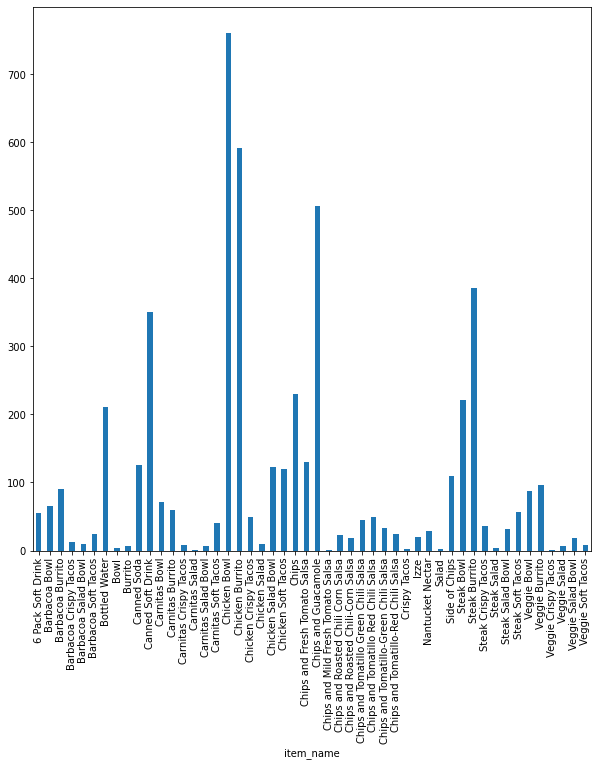

In [9]:
# 4. item당 주문 총량을 구하고 바형 그래프로 시각화하여 출력한다. 

item_names = chipotle.groupby("item_name")
item_quant = chipotle.groupby("item_name").sum()["quantity"]

item_quant.plot.bar(item_names, item_quant, figsize=(10,10))

In [10]:
# 5. item_price가 object형태의 데이터임으로 float 형태로 변경한다. 

chipotle["item_price"] = chipotle["item_price"].str.replace("$","").astype(float)

chipotle["item_price"].dtype

C:\Users\wndgj\AppData\Local\Temp\ipykernel_9708\1797271404.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle["item_price"] = chipotle["item_price"].str.replace("$","").astype(float)


dtype('float64')

In [11]:
# 6. 주문당 평균 계산 금액을 출력한다. 

order_price = chipotle.groupby("order_id").sum().mean()["item_price"]

order_price

18.811428571428568

In [14]:
# 7. 각 아이템의 가격을 출력 후 가격 분포 그래프와 가격 히스토그램을 출력한다. 

chipotle_one = chipotle[chipotle.quantity==1]
chipotle_one


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


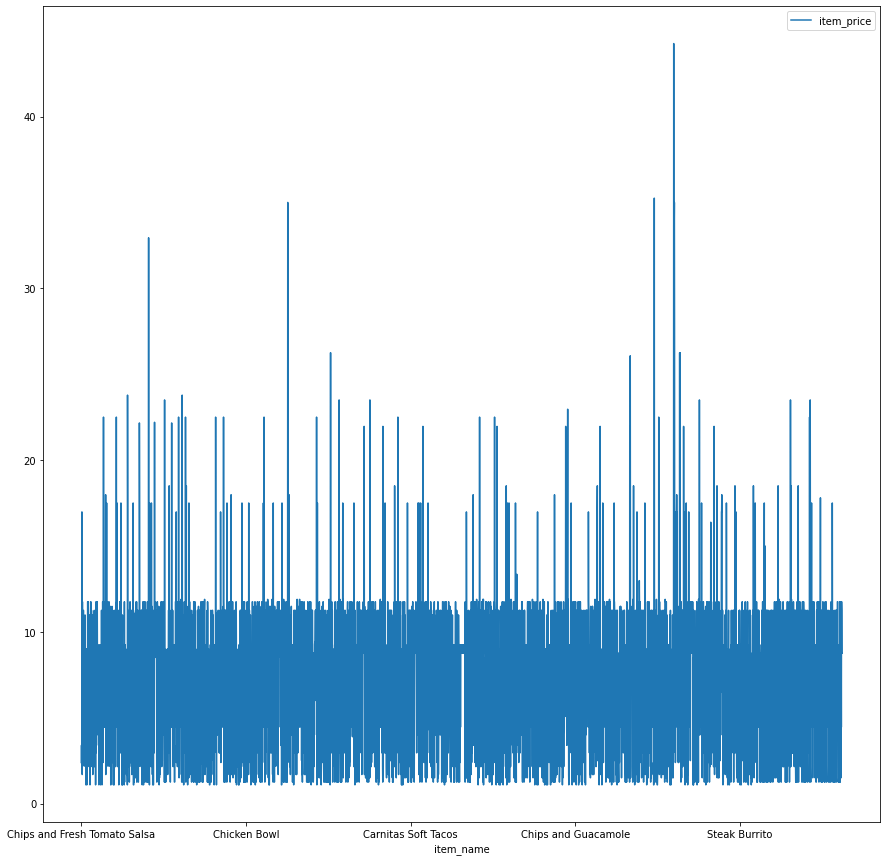

In [13]:

chipotle.plot(x="item_name", y="item_price", figsize=(15,15))
plt.show()